# Handwritten digit recognition using SVM

In [1]:
# Standard python imports
import matplotlib.pyplot as plt
%matplotlib notebook

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [2]:
# The digits dataset
digits = datasets.load_digits()

In [3]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
(n_samples, width, height) = digits.images.shape
#data = digits.images.reshape(n_samples, -1)
data = digits.images.reshape(n_samples, width * height)

In [4]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, train_size=0.6)

In [6]:
# We learn the digits on the first 60% of the digits
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Now predict the value of the digit on the remaining
expected = y_test
predicted = classifier.predict(X_test)

In [8]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        77
          1       0.99      1.00      0.99        68
          2       1.00      1.00      1.00        68
          3       0.99      0.99      0.99        73
          4       1.00      0.98      0.99        66
          5       0.97      1.00      0.98        83
          6       1.00      1.00      1.00        78
          7       0.98      1.00      0.99        64
          8       1.00      1.00      1.00        63
          9       1.00      0.95      0.97        79

avg / total       0.99      0.99      0.99       719


Confusion matrix:
[[77  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 68  0  

<IPython.core.display.Javascript object>


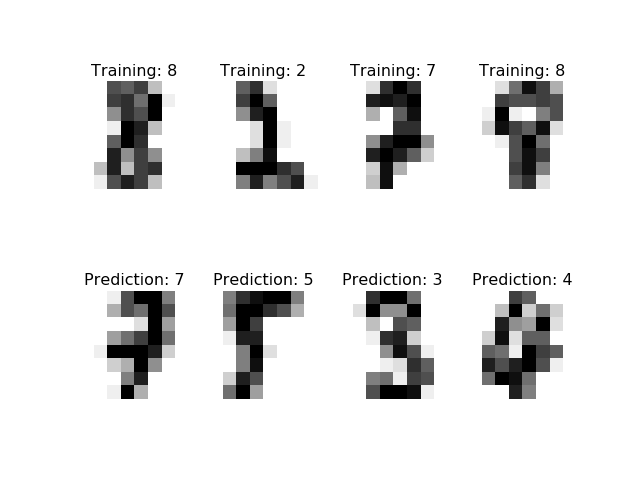

In [9]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(X_train.reshape(len(X_train),width,height), y_train))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

images_and_predictions = list(zip(X_test.reshape(len(X_test),width,height), predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()